<a href="https://colab.research.google.com/github/carlaolivei/Analise-Modelagem-dados-COVID-19/blob/main/visualizacao_analise_dados_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Importação das Bibliotecas</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgo
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pd.options.display.float_format = '{:.2f}'.format

<h1>Importação e Leitura dos Dados</h1>

In [3]:
## https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu
## liberando o acesso ao drive
## use essa opção se utilizar o Google Drive, neste caso basta apenas colocar o arquivo em uma pasta do Drive e copiar o caminho
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#utilize esta opção se desejar fazer o upload do arquivo
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

print("Upload concluído!")

Upload concluído!


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Inteligência Artificial/kaggle/My_datasets/Covid-19/owid-covid-data.csv')
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
247642,ZWE,Africa,Zimbabwe,2022-12-31,259981.00,0.00,0.00,5637.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
247643,ZWE,Africa,Zimbabwe,2023-01-01,259981.00,0.00,0.00,5637.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
247644,ZWE,Africa,Zimbabwe,2023-01-02,259981.00,0.00,0.00,5637.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
247645,ZWE,Africa,Zimbabwe,2023-01-03,259981.00,0.00,0.00,5637.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
247646,ZWE,Africa,Zimbabwe,2023-01-04,259981.00,0.00,0.00,5637.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN


<h1>Pré-processamento e Tratamento dos Dados</h1>

In [6]:
df.shape

(247647, 67)

In [7]:
df['location'].unique().shape

(248,)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247647 entries, 0 to 247646
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    247647 non-null  object 
 1   continent                                   233726 non-null  object 
 2   location                                    247647 non-null  object 
 3   date                                        247647 non-null  object 
 4   total_cases                                 233553 non-null  float64
 5   new_cases                                   233280 non-null  float64
 6   new_cases_smoothed                          232076 non-null  float64
 7   total_deaths                                214064 non-null  float64
 8   new_deaths                                  213992 non-null  float64
 9   new_deaths_smoothed                         212806 non-null  float64
 

In [9]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [10]:
df_country = df
df_country['location'].unique().shape

(248,)

In [11]:
df_country = df_country.drop(df_country[(df_country['location'] == 'Africa')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Asia')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Europe')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'European Union')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'High income')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'International')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Low income')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Lower middle income')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'North America')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'South America')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Upper middle income')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'World')].index)
df_country.reset_index(drop=True, inplace=True)

In [12]:
df_country['location'].unique().shape

(236,)

In [13]:
df.shape

(247647, 67)

In [14]:
df_country.shape

(234802, 67)

In [15]:
features_list = ['location', 'date','total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 
                 'reproduction_rate', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 
                 'total_boosters', 'population']

In [16]:
df_features = df_country[df_country.columns.intersection(features_list)]
df_features.head(1)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
0,Afghanistan,2020-02-24,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.00


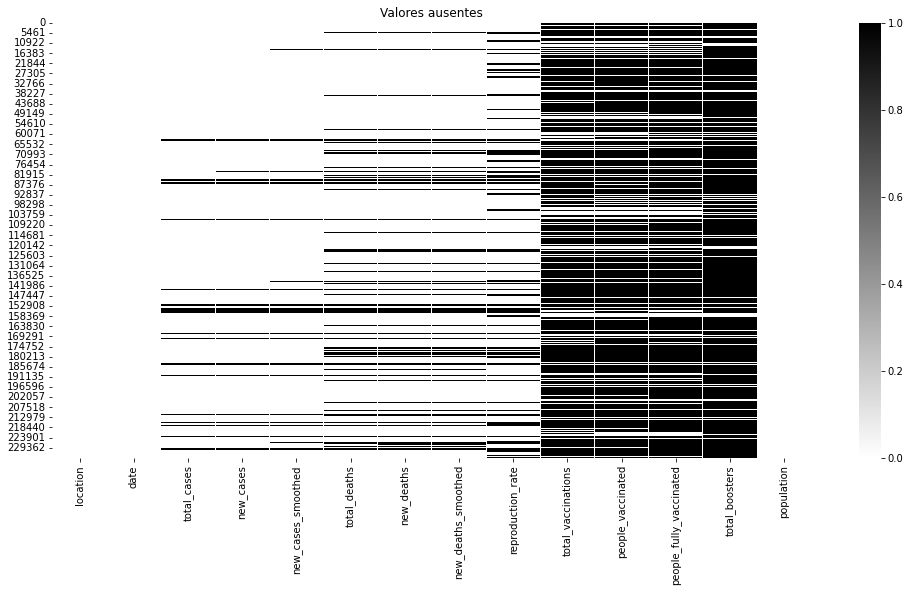

In [ ]:
f, ax = plt.subplots(figsize=(17, 8))
ax.set_title('Valores ausentes')
sns.heatmap(df_features.isnull(),cmap='binary')

In [17]:
df_features["new_cases"].replace(np.nan, 0, inplace=True)
df_features["new_cases_smoothed"].replace(np.nan, 0, inplace=True)
df_features["total_deaths"].replace(np.nan, 0, inplace=True)
df_features["new_deaths"].replace(np.nan, 0, inplace=True)
df_features["new_deaths_smoothed"].replace(np.nan, 0, inplace=True)
df_features["reproduction_rate"].replace(np.nan, 0, inplace=True)
df_features["total_vaccinations"].replace(np.nan, 0, inplace=True)
df_features["people_vaccinated"].replace(np.nan, 0, inplace=True)
df_features["people_fully_vaccinated"].replace(np.nan, 0, inplace=True)
df_features["total_boosters"].replace(np.nan, 0, inplace=True)
df_features["total_cases"].replace(np.nan, 0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
df_features.isnull().sum()

location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
total_deaths               0
new_deaths                 0
new_deaths_smoothed        0
reproduction_rate          0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
dtype: int64

In [19]:
df_features = df_features.assign(vaccination_ratio=[0]*len(df_features))
def vaccination_ratio(row):
    row.vaccination_ratio = (row.people_vaccinated / row.population) * 100 
    return row
df_features=df_features.apply(vaccination_ratio, axis=1)

In [20]:
df_features = df_features.assign(prevalence=[0]*len(df_features))
def prevalence(row):
    row.prevalence = (row.total_cases / row.population) * 100 
    return row
df_features=df_features.apply(prevalence, axis=1)

In [21]:
df_features = df_features.assign(incidence=[0]*len(df_features))
def incidence(row):
    row.incidence = (row.new_cases / (row.population - row.total_cases)) * 100 
    return row
df_features=df_features.apply(incidence, axis=1)

In [22]:
df_features.head(1)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,Afghanistan,2020-02-24,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41128772.00,0.00,0.00,0.00


In [23]:
df_features.to_csv('df_covid19_countries.csv', index=False)

In [ ]:
from google.colab import files
files.download("df_covid19_countries.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> Análise Exploratória dos Dados dos países</h1>

Paleta de cores: https://celke.com.br/artigo/tabela-de-cores-html-nome-hexadecimal-rgb

In [24]:
# 'population' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# total da população mundial
total = df_features.groupby('location').agg({'population':max})
total_population = total['population'].sum()
total_population

8087831091.0

In [25]:
#'total_deaths' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# total de mortes atribuídas ao COVID-19 no mundo
df_people_total_deaths = df_features.groupby('location').agg({'total_deaths':max})
sum_total_deaths = df_people_total_deaths['total_deaths'].sum()
sum_total_deaths

6720613.0

In [26]:
#'total_cases' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# total de casos confirmados de COVID-19 no mundo
df_people_total_cases = df_features.groupby('location').agg({'total_cases':max})
sum_total_cases = df_people_total_cases['total_cases'].sum()
sum_total_cases

675832245.0

In [27]:
#'total_vaccinations' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de doses de vacinação COVID-19 administradas no mundo
df_people_total_vaccinated = df_features.groupby('location').agg({'total_vaccinations':max})
sum_vac_total = df_people_total_vaccinated['total_vaccinations'].sum()
sum_vac_total

13428825032.0

In [28]:
#'people_fully_vaccinated' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial no mundo
df_people_fully_vaccinated = df_features.groupby('location').agg({'people_fully_vaccinated':max})
sum_vac_full = df_people_fully_vaccinated['people_fully_vaccinated'].sum()
sum_vac_full

5137642957.0

In [29]:
#'people_vaccinated' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de pessoas que receberam pelo menos uma dose de vacina no mundo
df_country_vac = df_features.groupby('location').agg({'people_vaccinated':max}).reset_index()
sum_vac = df_country_vac['people_vaccinated'].sum()
sum_vac

5594989623.0

In [30]:
#'total_boosters' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação
df_people_total_boosters = df_features.groupby('location').agg({'total_boosters':max})
sum_total_boosters = df_people_total_boosters['total_boosters'].sum()
sum_total_boosters

2776926698.0

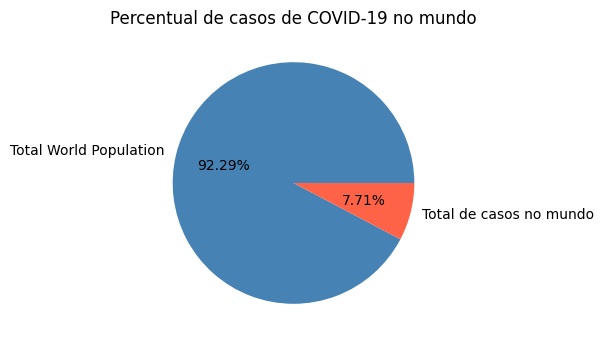

In [31]:
plt.figure(figsize=(8,4),dpi=100)
plt.pie(
    [total_population,sum_total_cases],
    autopct='%.2F%%',
    colors = ['#4682B4','#FF6347'],
    labels=['Total World Population','Total de casos no mundo'],)
plt.title('Percentual de casos de COVID-19 no mundo')
plt.show()

In [32]:
fig = px.bar(df, x=["População Mundial", "Total de Casos","Total de Mortes"], 
             y=[total_population,sum_total_cases,sum_total_deaths], color=["População Mundial", "Total de Casos","Total de Mortes"],
    labels=dict(x="População, Casos e Mortes por COVID-19", y="Total", color="COVID-19 no Mundo")
)
fig.show()

In [33]:
fig = px.bar(df, x=["População Mundial","Total de Vacinados", "Vacinados com 2 doses", "Vacinados com pelo menos 1 dose","Doses de Reforço"], 
             y=[total_population, sum_vac_total,sum_vac_full,sum_vac,sum_total_boosters], 
             color=["População Mundial","Total de Vacinados", "Vacinados com 2 doses","Vacinados com 1 dose","Doses de Reforço"],
    labels=dict(x="Vacinação Mundial contra o COVID-19", y="Total", color="Vacinação Mundial")
)
fig.show()

In [34]:
date_group = df_features.groupby('date').agg('sum').reset_index()
date_group.head(1)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,2020-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,173014444.00,0.00,0.00,0.00


In [35]:
fig = px.line(date_group, x="date", y="new_deaths", markers= True, title='Novas Mortes por COVID-19 no Mundo',
              color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [36]:
fig = px.line(date_group, x="date", y="new_cases", markers= True, title='Novos Casos de COVID-19 no Mundo',
              color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

In [37]:
print("Total de Vacinados e novas mortes por COVID-19 no mundo")
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=date_group['date'], y=date_group['total_vaccinations'], name="Total de Vacinados no Mundo"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=date_group['date'], y=date_group['new_deaths'], name="Novas Mortes no Mundo"),
    row=1, col=1, secondary_y=True,
)
fig.show()

Total de Vacinados e novas mortes por COVID-19 no mundo


In [38]:
print("Novos casos e novas mortes por COVID-19 no mundo")
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=date_group['date'], y=date_group['new_cases'], name="Novos Casos de Covid-19 no Mundo"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=date_group['date'], y=date_group['new_deaths'], name="Novas Mortes por Covid-19 no Mundo"),
    row=1, col=1, secondary_y=True,
)
fig.show()

Novos casos e novas mortes por COVID-19 no mundo


In [39]:
df_country_full_vac = df_features.groupby('location').agg({'people_fully_vaccinated':max})
df_country_full_vac.sort_values(['people_fully_vaccinated'], ascending=False, axis=0, inplace=True)
df_country_full_vac_top10 = df_country_full_vac.head(10)
df_country_full_vac_top10[[]]

""
location
China
India
United States
Brazil
Indonesia
Pakistan
Bangladesh
Japan
Vietnam


In [40]:
print("10 Países com maior número de vacinados com todas as doses prescritas'")
data = dict(
    number=df_country_full_vac_top10['people_fully_vaccinated'],
    stage=["China", "India", "United States", "Brazil", "Indonesia","Pakistan","Bangladesh","Japan","Vietnam","Mexico"])
fig = px.funnel(data, x='number', y='stage',color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

10 Países com maior número de vacinados com todas as doses prescritas'


In [41]:
df_country_deaths = df_features.groupby('location').sum('New_deaths')
df_country_deaths.sort_values(['new_deaths'], ascending=False, axis=0, inplace=True)
df_country_deaths_top10 = df_country_deaths.head(10)
df_country_deaths_top10[[]]

""
location
United States
Brazil
India
Russia
Mexico
Peru
United Kingdom
Italy
France


In [42]:
print("10 Países com maior número de mortes por COVID-19")
data = dict(
    number=df_country_deaths_top10['new_deaths'],
    stage=["United States", "Brazil", "India", "Russia", "Mexico","Peru","United Kingdom","Italy","France","Germany"])
fig = px.funnel(data, x='number', y='stage',color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

10 Países com maior número de mortes por COVID-19


<h1>Analise Exploratório dos Dados do Brasil</h1>

In [43]:
df_brazil = df_features[df_features['location']=='Brazil']

In [44]:
df_brazil.tail(1)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
29056,Brazil,2023-01-04,36423138.00,60772.00,22631.00,694411.00,430.00,121.29,0.00,480430556.00,188566405.00,174908749.00,122692958.00,215313504.00,87.58,16.92,0.03


In [45]:
df_brazil.shape

(1044, 17)

In [46]:
df_brazil.isnull().sum()

location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
total_deaths               0
new_deaths                 0
new_deaths_smoothed        0
reproduction_rate          0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
vaccination_ratio          0
prevalence                 0
incidence                  0
dtype: int64

In [47]:
#total da população do brazil
total_pop_brazil = df_brazil['population'].unique().max()
total_pop_brazil

215313504.0

In [48]:
#'total_cases' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# total de casos confirmados de COVID-19 no Brasil
df_country_brazil = df_brazil.agg({'total_cases':max})
sum_total_cases_brazil = df_country_brazil['total_cases'].sum()
sum_total_cases_brazil

36423138.0

In [49]:
#'total_deaths' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# Total de mortes atribuídas ao COVID-19 no Brasil
df_country_brazil = df_brazil.agg({'total_deaths':max})
sum_total_deaths_brazil = df_country_brazil['total_deaths'].sum()
sum_total_deaths_brazil

694411.0

In [50]:
#'total_vaccinations' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de doses de vacinação COVID-19 administradas no Brasil
df_country_brazil = df_brazil.agg({'total_vaccinations':max})
sum_total_vaccinations_brazil = df_country_brazil['total_vaccinations'].sum()
sum_total_vaccinations_brazil

480430556.0

In [51]:
#'people_fully_vaccinated' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de pessoas que receberam todas as doses prescritas pelo protocolo no Brasil
df_country_brazil = df_brazil.agg({'people_fully_vaccinated':max})
sum_vac_full_brazil = df_country_brazil['people_fully_vaccinated'].sum()
sum_vac_full_brazil

174908749.0

In [52]:
#'people_vaccinated' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# Número total de pessoas que receberam pelo menos uma dose da vacina no Brasil
df_country_vac_brazil = df_brazil.agg({'people_vaccinated':max})
sum_vac_brazil = df_country_vac_brazil['people_vaccinated'].sum()
sum_vac_brazil

188566405.0

In [53]:
#'total_boosters' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação)
df_people_total_boosters_brazil = df_brazil.groupby('location').agg({'total_boosters':max})
sum_total_boosters_brazil = df_people_total_boosters_brazil['total_boosters'].sum()
sum_total_boosters_brazil

122692958.0

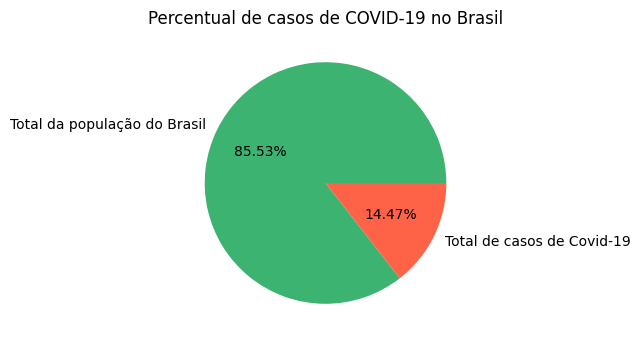

In [54]:
plt.figure(figsize=(8,4),dpi=100)
plt.pie(
    [total_pop_brazil,sum_total_cases_brazil],
    autopct='%.2F%%',
    colors = ['#3CB371','#FF6347'],
    labels=['Total da população do Brasil','Total de casos de Covid-19'],)
plt.title('Percentual de casos de COVID-19 no Brasil')
plt.show()

In [55]:
fig = px.bar(df, x=["Total da População", "Total de Casos","Total de Mortes"], 
             y=[total_pop_brazil,sum_total_cases_brazil,sum_total_deaths_brazil], color=["População", "Total de Casos","Total de Mortes"],
    labels=dict(x="População, Casos e Mortes por COVID-19 no Brasil", y="Total", color="COVID-19 Brasil")
)
fig.show()

In [56]:
fig = px.bar(df, x=["Total da População","Total de Vacinados", "Vacinados com 2 doses", "Vacinados com 1 dose","Doses de Reforço"], 
             y=[total_pop_brazil,sum_total_vaccinations_brazil,sum_vac_full_brazil, sum_vac_brazil, sum_total_boosters_brazil], 
             color=["Total da População","Total de Vacinados", "Vacinados com 2 doses","Vacinados com 1 dose","Doses de Reforço"],
    labels=dict(x="Vacinação contra o COVID-19 no Brasil", y="Total", color="Vacinação no Brasil")
)
fig.show()

In [57]:
date_group_brazil = df_brazil.groupby('date').agg('sum').reset_index()
date_group_brazil.head(1)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
0,2020-02-26,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,215313504.00,0.00,0.00,0.00


In [58]:
fig = px.line(date_group_brazil, x="date", y="new_deaths", markers= True, title='Novas Mortes por COVID-19 no Brasil',
              color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [59]:
fig = px.line(date_group_brazil, x="date", y="new_cases", markers= True, title='Novos Casos de COVID-19 no Brasil',
              color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

In [60]:
print("Total de vacinados e novas mortes por COVID-19 no Brasil")
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=date_group_brazil['date'], y=date_group_brazil['total_vaccinations'], name="Total de Vacinados Covid-19 no Brasil"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=date_group_brazil['date'], y=date_group_brazil['new_deaths'], name="Novas Mortes Covid-19 no Brasil"),
    row=1, col=1, secondary_y=True,
)
fig.show()

Total de vacinados e novas mortes por COVID-19 no Brasil


In [61]:
print("Novos casos e novas mortes por COVID-19 no Brasil")
fig = make_subplots(rows=1, cols=1,
                    specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=date_group_brazil['date'], y=date_group_brazil['new_cases'], name="Novos Casos Covid-19 no Brasil"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=date_group_brazil['date'], y=date_group_brazil['new_deaths'], name="Novas Mortes Covid-19 no Brasil"),
    row=1, col=1, secondary_y=True,
)
fig.show()

Novos casos e novas mortes por COVID-19 no Brasil


Text(0.5, 1.0, 'Novos casos suavizados vs Novas mortes suavizadas por Covid 19 - Brasil até 12/11/2022')

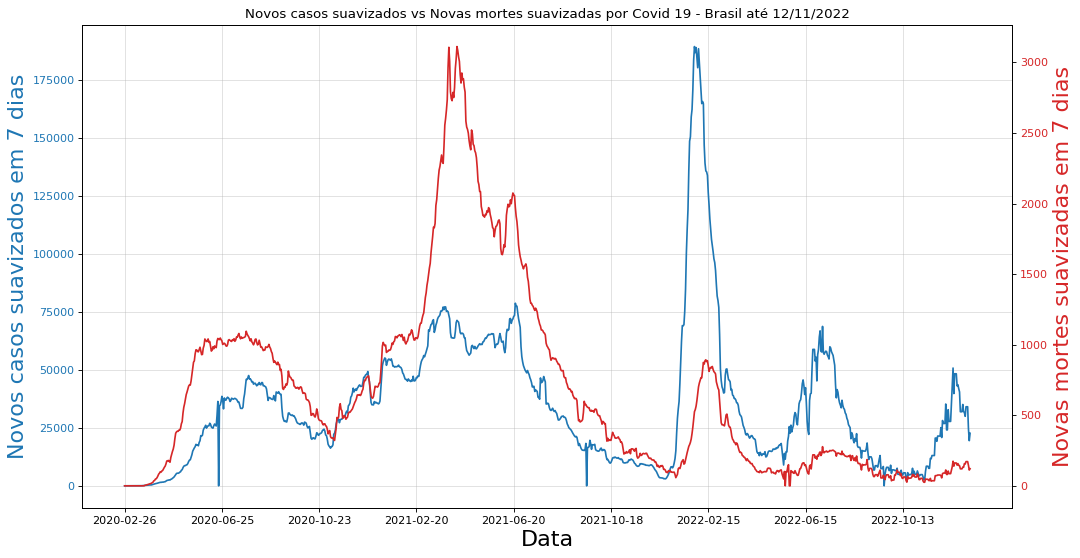

In [ ]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_cases_smoothed']
y2 = date_group_brazil['new_deaths_smoothed']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Novos casos suavizados em 7 dias',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Novas mortes suavizadas em 7 dias',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Novos casos suavizados vs Novas mortes suavizadas por Covid 19 - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Total de novos casos vs Total de novos casos suavizados em 7 dias - Brasil até 12/11/2022')

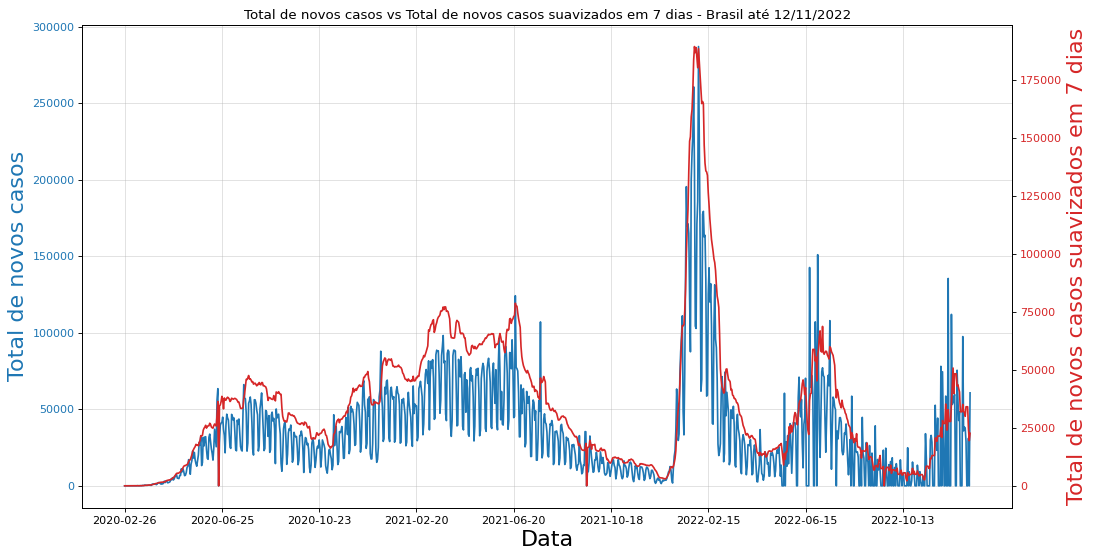

In [ ]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_cases']
y2 = date_group_brazil['new_cases_smoothed']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novos casos',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Total de novos casos suavizados em 7 dias',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Total de novos casos vs Total de novos casos suavizados em 7 dias - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Novos casos suavizados em 7 dias vs Taxa de Transimissão - Brasil até 12/11/2022')

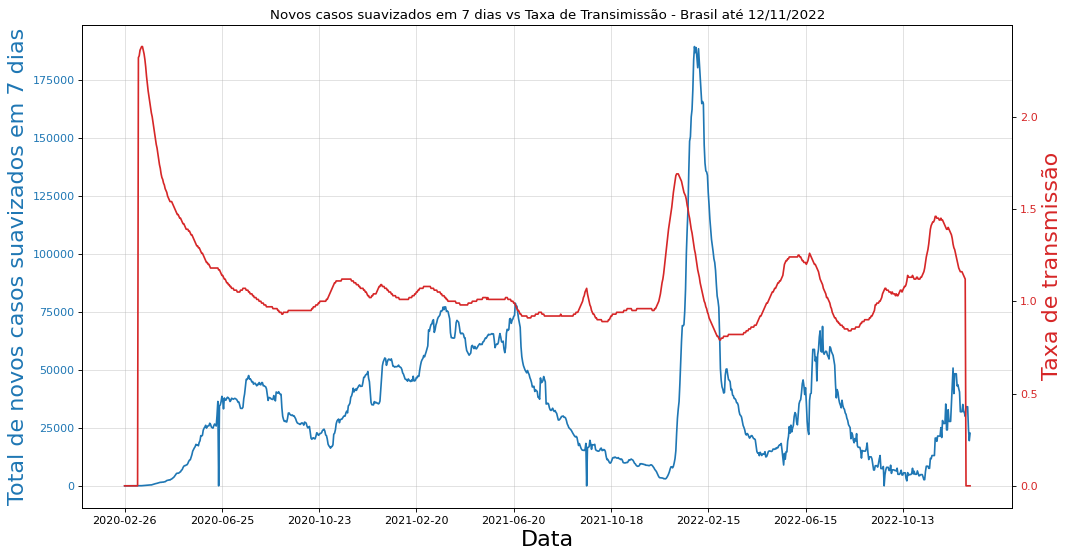

In [ ]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_cases_smoothed']
y2 = date_group_brazil['reproduction_rate']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novos casos suavizados em 7 dias',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Taxa de transmissão',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Novos casos suavizados em 7 dias vs Taxa de Transimissão - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Total de novas mortes vs novas mortes suavizadas em 7 dias - Brasil até 12/11/2022')

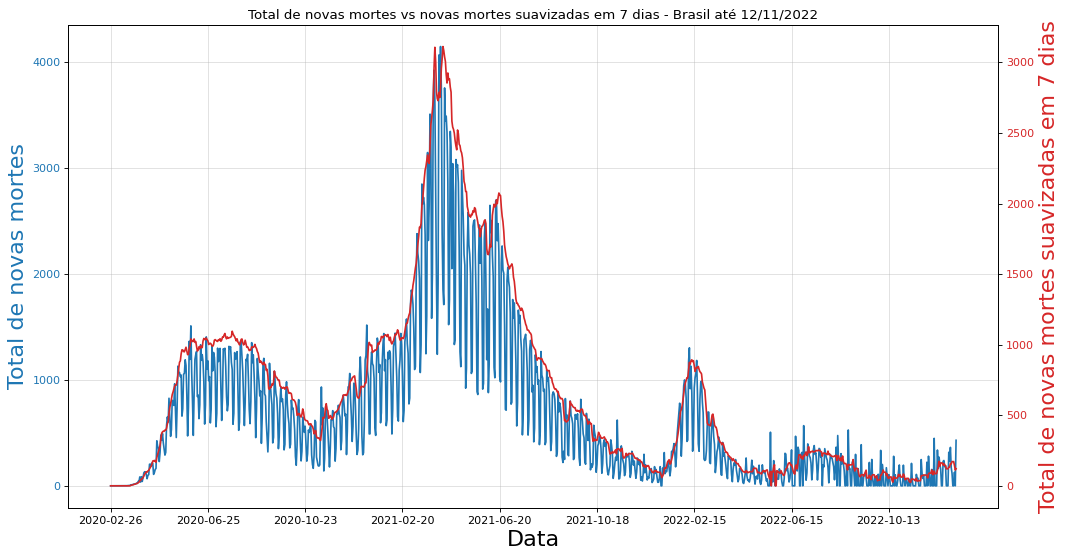

In [ ]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_deaths']
y2 = date_group_brazil['new_deaths_smoothed']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novas mortes',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Total de novas mortes suavizadas em 7 dias',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Total de novas mortes vs novas mortes suavizadas em 7 dias - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Novas mortes suavizadas em 7 dias vs Taxa de Transimissão - Brasil até 12/11/2022')

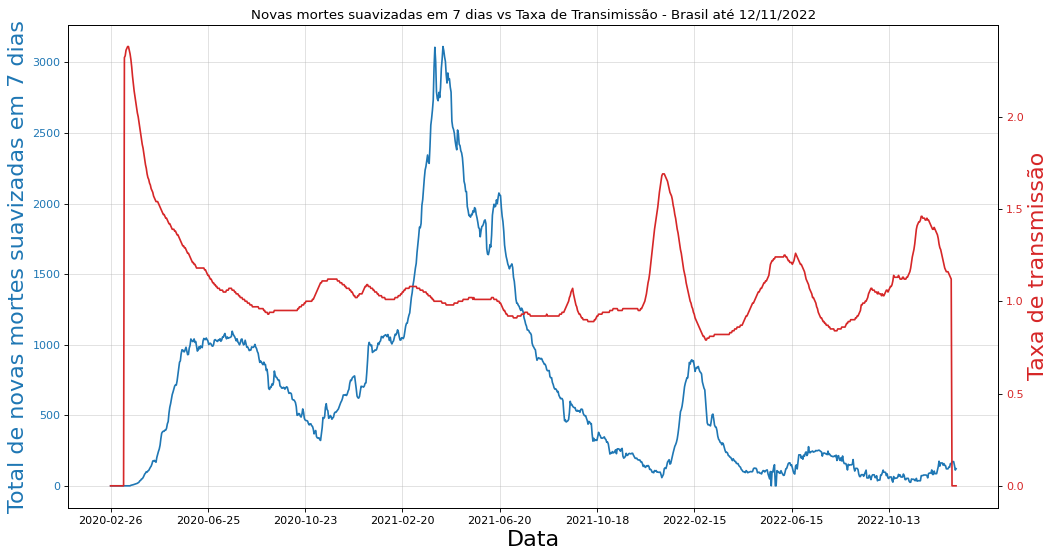

In [ ]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_deaths_smoothed']
y2 = date_group_brazil['reproduction_rate']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novas mortes suavizadas em 7 dias',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Taxa de transmissão',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Novas mortes suavizadas em 7 dias vs Taxa de Transimissão - Brasil até 12/11/2022')

In [ ]:
correlacao = df_brazil.corr()
correlacao

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
total_cases,1.000000,0.015932,0.032923,0.969430,-0.346347,-0.368786,-0.152137,0.775485,0.756037,0.760915,0.702219,NaN,0.756037,1.000000,0.060484
new_cases,0.015932,1.000000,0.847155,0.058596,0.524411,0.418444,-0.002180,-0.029314,-0.008908,-0.018687,-0.060479,NaN,-0.008908,0.015932,0.998009
new_cases_smoothed,0.032923,0.847155,1.000000,0.080071,0.472814,0.506261,-0.066255,-0.012110,0.011242,-0.002521,-0.054678,NaN,0.011242,0.032923,0.842989
total_deaths,0.969430,0.058596,0.080071,1.000000,-0.275607,-0.287486,-0.180862,0.762939,0.789462,0.753930,0.594969,NaN,0.789462,0.969430,0.100555
new_deaths,-0.346347,0.524411,0.472814,-0.275607,1.000000,0.910045,-0.112210,-0.415091,-0.362767,-0.429692,-0.408919,NaN,-0.362767,-0.346347,0.486790
new_deaths_smoothed,-0.368786,0.418444,0.506261,-0.287486,0.910045,1.000000,-0.143749,-0.444633,-0.384872,-0.461940,-0.444469,NaN,-0.384872,-0.368786,0.381389
reproduction_rate,-0.152137,-0.002180,-0.066255,-0.180862,-0.112210,-0.143749,1.000000,-0.066908,-0.097629,-0.056618,-0.003470,NaN,-0.097629,-0.152137,-0.000432
total_vaccinations,0.775485,-0.029314,-0.012110,0.762939,-0.415091,-0.444633,-0.066908,1.000000,0.969799,0.994551,0.881850,NaN,0.969799,0.775485,0.010173
people_vaccinated,0.756037,-0.008908,0.011242,0.789462,-0.362767,-0.384872,-0.097629,0.969799,1.000000,0.964526,0.773939,NaN,1.000000,0.756037,0.029535
people_fully_vaccinated,0.760915,-0.018687,-0.002521,0.753930,-0.429692,-0.461940,-0.056618,0.994551,0.964526,1.000000,0.862104,NaN,0.964526,0.760915,0.020806


In [ ]:
df_correlacao = df_brazil[['new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed','reproduction_rate',
                           'total_vaccinations','people_vaccinated','people_fully_vaccinated']]
df_correlacao.shape

(1044, 8)

In [ ]:
correlacao_selecao = df_correlacao.corr()
correlacao_selecao

,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated
new_cases,1.000000,0.847155,0.524411,0.418444,-0.002180,-0.029314,-0.008908,-0.018687
new_cases_smoothed,0.847155,1.000000,0.472814,0.506261,-0.066255,-0.012110,0.011242,-0.002521
new_deaths,0.524411,0.472814,1.000000,0.910045,-0.112210,-0.415091,-0.362767,-0.429692
new_deaths_smoothed,0.418444,0.506261,0.910045,1.000000,-0.143749,-0.444633,-0.384872,-0.461940
reproduction_rate,-0.002180,-0.066255,-0.112210,-0.143749,1.000000,-0.066908,-0.097629,-0.056618
total_vaccinations,-0.029314,-0.012110,-0.415091,-0.444633,-0.066908,1.000000,0.969799,0.994551
people_vaccinated,-0.008908,0.011242,-0.362767,-0.384872,-0.097629,0.969799,1.000000,0.964526
people_fully_vaccinated,-0.018687,-0.002521,-0.429692,-0.461940,-0.056618,0.994551,0.964526,1.000000


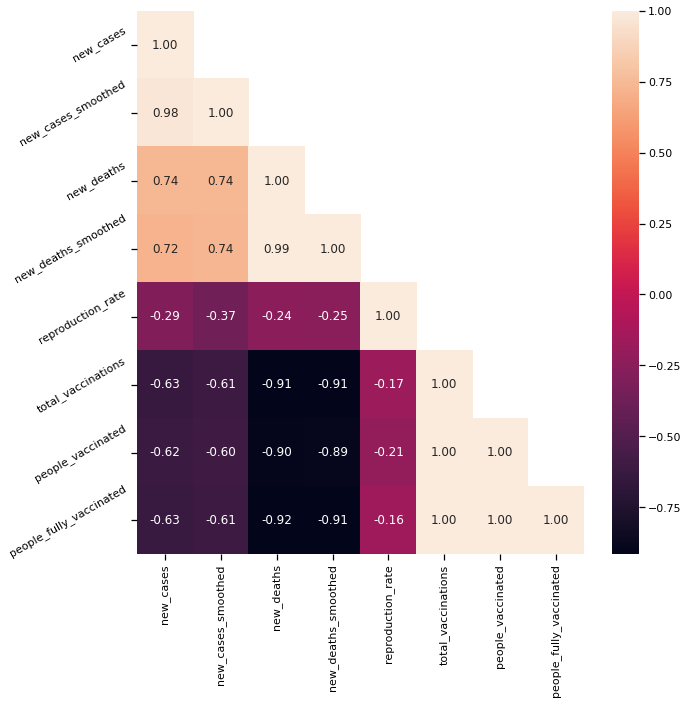

In [ ]:
corr = correlacao_selecao.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

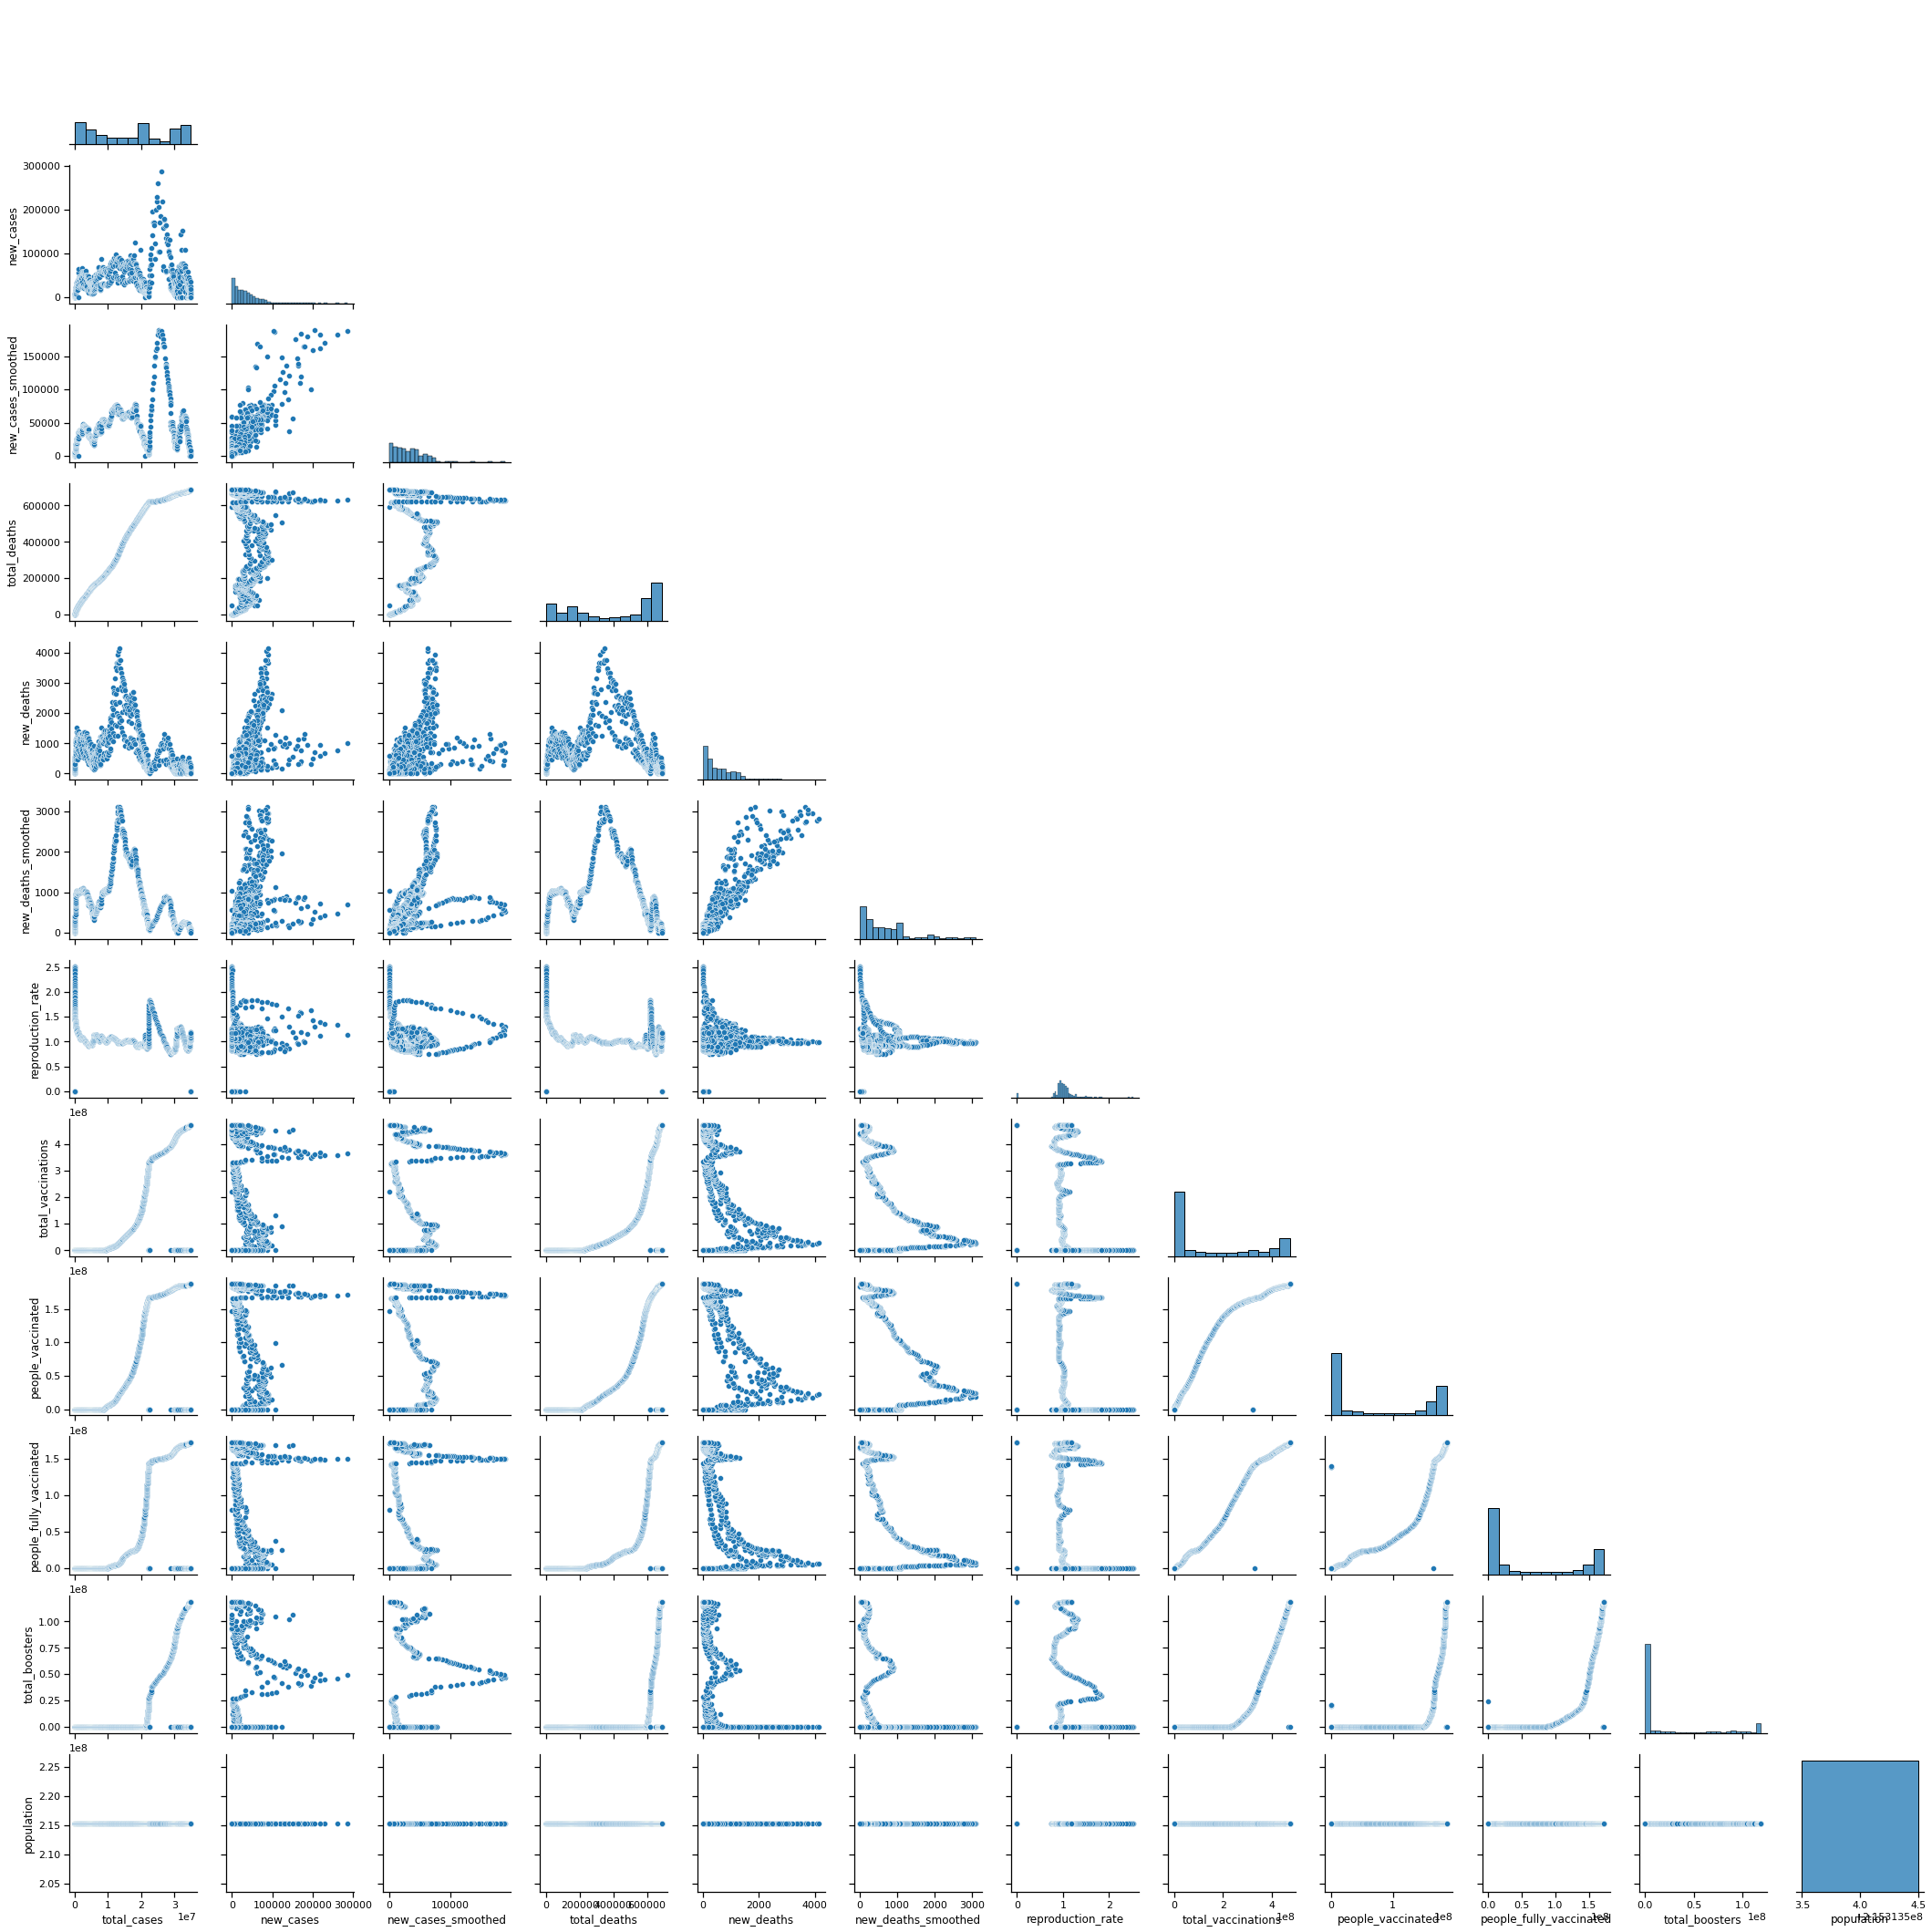

In [ ]:
colors = ['red','blue','black','green','yellow']
sns.pairplot(data=df_brazil,corner=True,palette=colors)